# Spotify data
The source of data is [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks)

The data is about Spotify songs information. This csv file contains the data mentioned in the description. Each row represents a single track, each column represents a field of the track (audio features and identifiers).  
The _data.csv_ file contains more than 160.000 songs collected from Spotify Web AP. The struct of this data is the follow:  

* **Primary**:
    - id (Id of track generated by Spotify)
* **Numerical**:
    - **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    - **danceabilit** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
    - **energy** -  Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    - **duration_ms** (Integer typically ranging from 200k to 300k) - The duration of the track in milliseconds.
    - **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    - **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    - **popularity** The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time (range 0 to 100)
    - **tempo** (Float typically ranging from 50 to 150) - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
    - **liveness** (Ranges from 0 to 1) - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
    - **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    - **speechiness** (Ranges from 0 to 1) - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
    - **year** (Ranges from 1921 to 2020)
* **Dummy**:
    - mode (0 = Minor, 1 = Major) - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    - explicit (0 = No explicit content, 1 = Explicit content)
* **Categorical**:
    - key - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    - artists (List of artists mentioned). 
    - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - name (Name of the song)

I would thank to [Yamaç Eren Ay](https://www.kaggle.com/yamaerenay) for create this dataset 

In [1]:
import csv
import json
import numpy
import matplotlib.pyplot as plt
import pprint
import time
import calendar
from collections import defaultdict
import string
import operator

path = "C:/Users/Ian/Documents/PythonDataProducts4PredictiveAnalytics/BasicDataProcessing&Visualization/Final_Course1/FinalProject/data.csv"

## Open file
Open file and get header, the structure of data is below:  

In [2]:
file = open(path, 'r', encoding='UTF8')
data = csv.reader(file)
header = next(data)
header

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'valence',
 'year']

Example a data

In [3]:
next(data)

['0.995',
 "['Carl Woitschach']",
 '0.708',
 '158648',
 '0.195',
 '0',
 '6KbQ3uYMLKb5jDxLF7wYDD',
 '0.563',
 '10',
 '0.151',
 '-12.428',
 '1',
 'Singende Bataillone 1. Teil',
 '0',
 '1928',
 '0.0506',
 '118.469',
 '0.779',
 '1928']

* Convert a **json file**
* Clean a dataset
* Convert fields of strings to int, float, boolean and list 

In [4]:
dataset = []
for line in data:
    d = dict(zip(header, line))
    for field in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'tempo', 'liveness', 'loudness', 'speechiness']:
        d[field] = float(d[field])
    for field in ['year', 'popularity', 'duration_ms', 'key']:
        d[field] = int(d[field])
    for field in ['explicit']:
        if(d[field] == '1'):
            d[field] = True
        else:
            d[field] = False
    for field in ['mode']:
        if(d[field] == '1'):
            d[field] = 'Major'
        else:
            d[field] = 'Minor'
    for field in ['artists']:
        d[field] = d[field].replace("[","").replace("'","").replace("]", "").split(",")
    for field in ['release_date']:
        if(len(d[field]) == 4):
            d[field] = time.strptime(d[field], "%Y")
        elif(len(d[field]) == 7):
            d[field] = time.strptime(d[field], "%Y-%m")
        else:
            d[field] = time.strptime(d[field], "%Y-%m-%d")
            
            
    dataset.append(d)

Example of a dictionary

In [5]:
dataset[30]

{'acousticness': 0.995,
 'artists': ['Ignacio Corsini'],
 'danceability': 0.531,
 'duration_ms': 159107,
 'energy': 0.124,
 'explicit': False,
 'id': '6XoyWGdCJwFaJV1Pnmphwr',
 'instrumentalness': 0.0168,
 'key': 2,
 'liveness': 0.118,
 'loudness': -23.243,
 'mode': 'Major',
 'name': 'Por una Mujer - Remasterizado',
 'popularity': 0,
 'release_date': time.struct_time(tm_year=1928, tm_mon=5, tm_mday=14, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=135, tm_isdst=-1),
 'speechiness': 0.0711,
 'tempo': 101.902,
 'valence': 0.555,
 'year': 1928}

## Statistics

#### Total of songs

In [6]:
print("Total songs: ", len(dataset))

Total songs:  169908


#### Average of popularity, min and max

In [7]:
avgPopularity = numpy.array([d['popularity'] for d in dataset])
print('Average popularity: ', numpy.mean(avgPopularity))
print('Minimum value:', numpy.min(avgPopularity))
print('Maximum value:', numpy.max(avgPopularity))

Average popularity:  31.55679544223933
Minimum value: 0
Maximum value: 100


#### Popularity by liveness

In [8]:
live = []
notLive = []
for d in dataset:    
    if(d['liveness'] >= 0.75):
        live.append(d)
    else:
        notLive.append(d)
    
print("Live songs: ", len(live))
print("Not live songs: ", len(notLive))

Live songs:  4385
Not live songs:  165523


In [9]:
averageLivePopularity = [d['popularity'] for d in live]
averageNotLivePopularity = [d['popularity'] for d in notLive]
print("Popularity live songs: ", sum(averageLivePopularity)/len(averageLivePopularity))
print("Popularity not live songs: ", sum(averageNotLivePopularity)/len(averageNotLivePopularity))

Popularity live songs:  29.184264538198402
Popularity not live songs:  31.619648024745807


#### Popularity by energy

In [10]:
HighEnergy = []
LowEnergy = []
for d in dataset:    
    if(d['energy'] >= 0.5):
        HighEnergy.append(d)
    else:
        LowEnergy.append(d)
    
print("High energy songs: ", len(HighEnergy))
print("Low energy songs: ", len(LowEnergy))

High energy songs:  81212
Low energy songs:  88696


In [11]:
averageHighEnergy = [d['popularity'] for d in HighEnergy]
averageLowEnergy = [d['popularity'] for d in LowEnergy]
print("Popularity high energy songs songs: ", sum(averageHighEnergy)/len(averageHighEnergy))
print("Popularity low energy songs songs: ", sum(averageLowEnergy)/len(averageLowEnergy))

Popularity high energy songs songs:  41.989274983992516
Popularity low energy songs songs:  22.004588707495266


#### Popularity by valence

In [12]:
HighValence = []
LowValence = []
for d in dataset:    
    if(d['valence'] >= 0.5):
        HighValence.append(d)
    else:
        LowValence.append(d)
    
print("High valence songs: ", len(HighValence))
print("Low valence songs: ", len(LowValence))

High energy songs:  94268
Low energy songs:  75640


In [13]:
averageHighValence = [d['popularity'] for d in HighValence]
averageLowValence = [d['popularity'] for d in LowValence]
print("Popularity high valence songs songs: ", sum(averageHighValence)/len(averageHighValence))
print("Popularity low valence songs songs: ", sum(averageLowValence)/len(averageLowValence))

Popularity high energy songs songs:  31.32060720499003
Popularity low energy songs songs:  31.851150185087256


#### Songs by author

In [14]:
nSongsByAuthor = defaultdict(int)
for d in dataset:
    for artist in d['artists']:
        nSongsByAuthor[artist] += 1
nSongsByAuthor = sorted(nSongsByAuthor.items(), key=operator.itemgetter(1), reverse = True)

pprint.pprint(nSongsByAuthor[:10])

[('Francisco Canaro', 2234),
 ('Эрнест Хемингуэй', 1215),
 ('Frédéric Chopin', 1033),
 ('Ludwig van Beethoven', 976),
 ('Wolfgang Amadeus Mozart', 938),
 ('Johann Sebastian Bach', 844),
 ('Эрих Мария Ремарк', 781),
 ('Igor Stravinsky', 724),
 ('Giuseppe Verdi', 689),
 ('Frank Sinatra', 686)]


#### Number of songs by year

In [15]:
nSongsByYear = defaultdict(int)
for d in dataset:
    nSongsByYear[d['year']] += 1
nSongsByYear = sorted(nSongsByYear.items())

pprint.pprint(nSongsByYear[:80])

[(1921, 128),
 (1922, 72),
 (1923, 169),
 (1924, 237),
 (1925, 263),
 (1926, 874),
 (1927, 596),
 (1928, 1182),
 (1929, 924),
 (1930, 1814),
 (1931, 633),
 (1932, 479),
 (1933, 622),
 (1934, 554),
 (1935, 1562),
 (1936, 1054),
 (1937, 596),
 (1938, 576),
 (1939, 999),
 (1940, 2000),
 (1941, 966),
 (1942, 1649),
 (1943, 634),
 (1944, 769),
 (1945, 2000),
 (1946, 1503),
 (1947, 1579),
 (1948, 1868),
 (1949, 2000),
 (1950, 2000),
 (1951, 2000),
 (1952, 2000),
 (1953, 1950),
 (1954, 2000),
 (1955, 2000),
 (1956, 2000),
 (1957, 2000),
 (1958, 2000),
 (1959, 2000),
 (1960, 2000),
 (1961, 2000),
 (1962, 2000),
 (1963, 2000),
 (1964, 2000),
 (1965, 2000),
 (1966, 2000),
 (1967, 2000),
 (1968, 2000),
 (1969, 2000),
 (1970, 2000),
 (1971, 2000),
 (1972, 2000),
 (1973, 2000),
 (1974, 2000),
 (1975, 2000),
 (1976, 2000),
 (1977, 2000),
 (1978, 2000),
 (1979, 2000),
 (1980, 2000),
 (1981, 2000),
 (1982, 2000),
 (1983, 2000),
 (1984, 2000),
 (1985, 2000),
 (1986, 2000),
 (1987, 2000),
 (1988, 2000),

# Visualizing Data

There are few live songs and the tracks with little popularity are live songs.

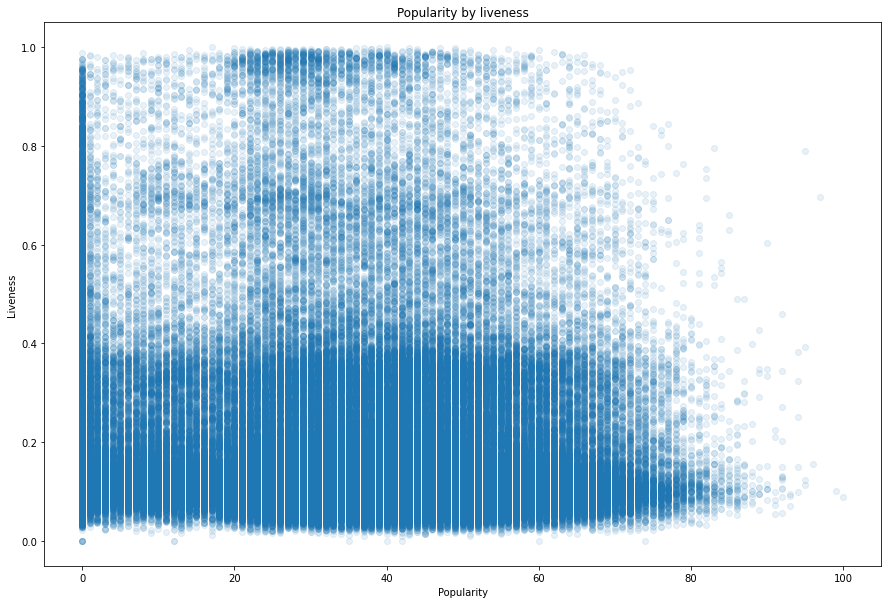

In [20]:
X_PL = [d['popularity'] for d in dataset]
Y_PL = [d['liveness'] for d in dataset]

plt.figure(figsize=(15,10))
plt.xlabel("Popularity")
plt.ylabel("Liveness")
plt.title("Popularity by liveness")
plt.scatter(X_PL, Y_PL, alpha=0.1)
plt.show()

The energy of the most popular songs is around between 0.4 and 1

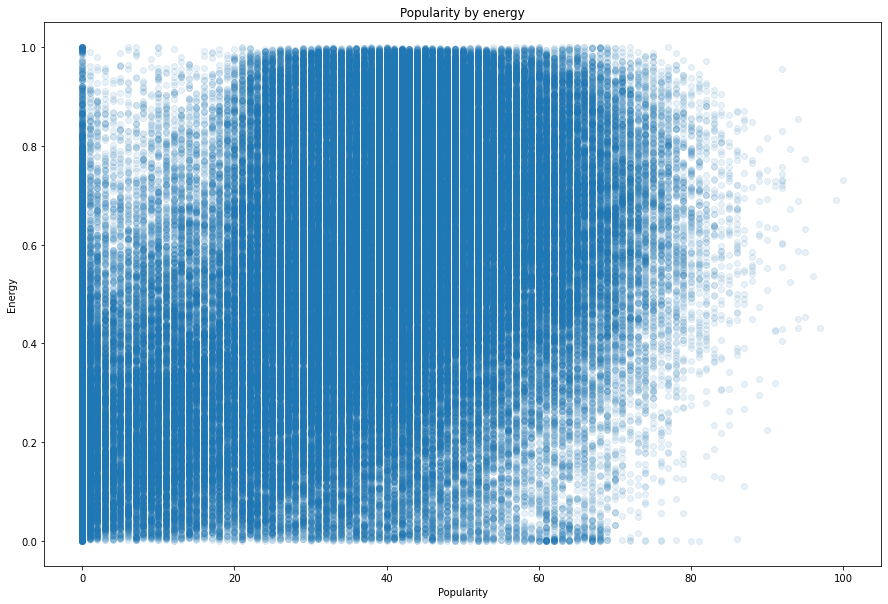

In [28]:
X_PE = [d['popularity'] for d in dataset]
Y_PE = [d['energy'] for d in dataset]

plt.figure(figsize=(15,10))
plt.xlabel("Popularity")
plt.ylabel("Energy")
plt.title("Popularity by energy")
plt.scatter(X_PE, Y_PE, alpha=0.1)
plt.show()

The valence does not matter in the popularity of the song

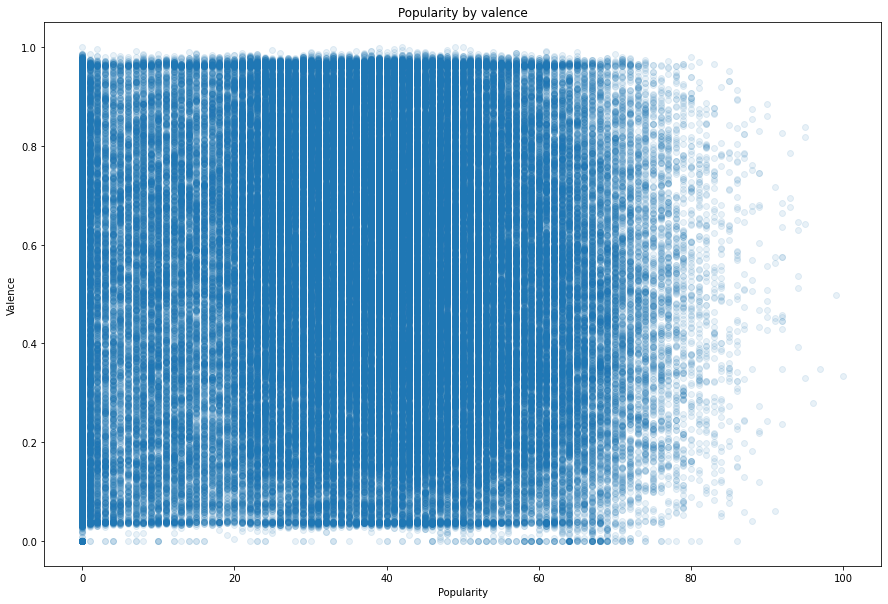

In [29]:
X_PV = [d['popularity'] for d in dataset]
Y_PV = [d['valence'] for d in dataset]

plt.figure(figsize=(15,10))
plt.xlabel("Popularity")
plt.ylabel("Valence")
plt.title("Popularity by valence")
plt.scatter(X_PV, Y_PV, alpha=0.1)
plt.show()

Top ten artist with more collaborations tracks in dataset

<BarContainer object of 10 artists>

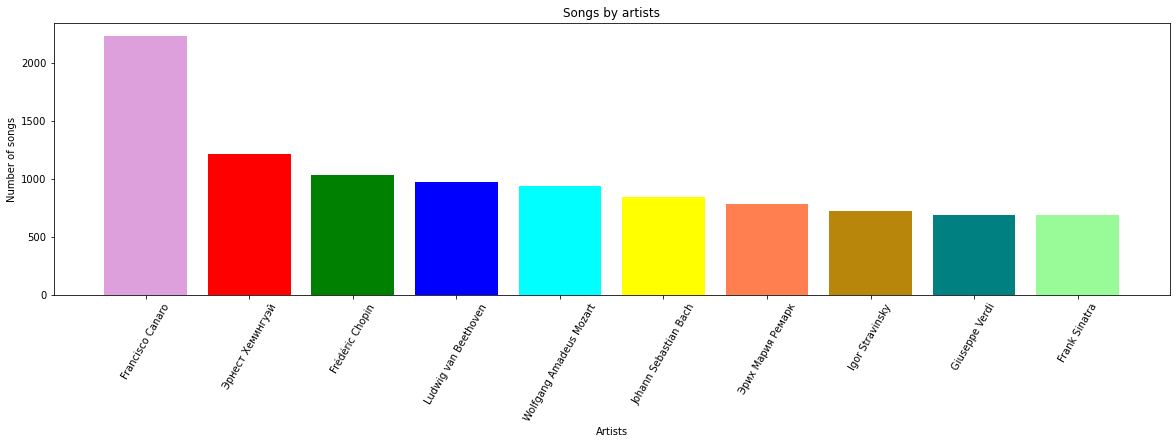

In [25]:
X_SBA = []
Y_SBA = []
for data in nSongsByAuthor[:10]:
    X_SBA.append(data[0])
    Y_SBA.append(data[1])

plt.figure(figsize=(20,5))


plt.xlabel("Artists")
plt.ylabel("Number of songs")
plt.title("Songs by artists")
plt.xticks(rotation=60)
plt.bar(X_SBA,Y_SBA, color=['plum', 'red', 'green', 'blue', 'cyan', 'yellow', 'coral', 'darkgoldenrod', 'teal', 'palegreen'])

The number of songs of dataset per year. Since 1949 the number of songs is constant with around 2000 songs

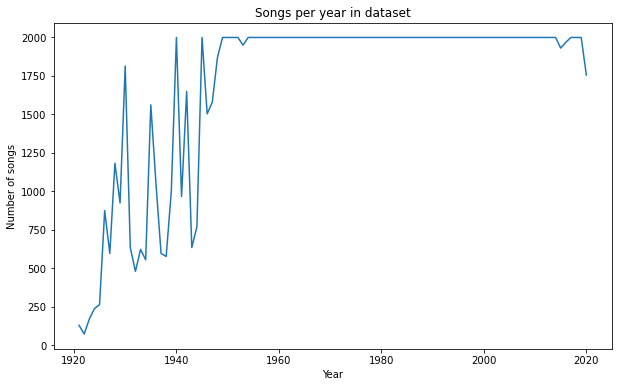

In [27]:
X_SBY= []
Y_SBY = []
for data in nSongsByYear:
    X_SBY.append(data[0])
    Y_SBY.append(data[1])

plt.figure(figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.title("Songs per year in dataset")
plt.plot(X_SBY,Y_SBY)

Behavior of some variables where each range of values is between 0 and 1

In [30]:
dataAcousticness = [d['acousticness'] for d in dataset]
dataDanceability = [d['danceability'] for d in dataset]
dataInstrumentalness = [d['instrumentalness'] for d in dataset]
dataSpeechiness = [d['speechiness'] for d in dataset]

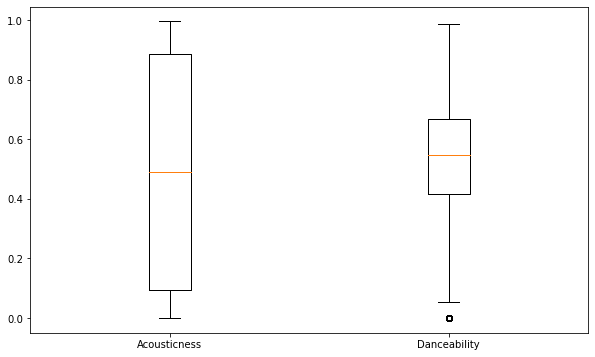

In [72]:
plt.figure(figsize=(10,6))
plt.boxplot([dataAcousticness, dataDanceability])
plt.xticks([1, 2], ['Acousticness', 'Danceability'])


plt.show()

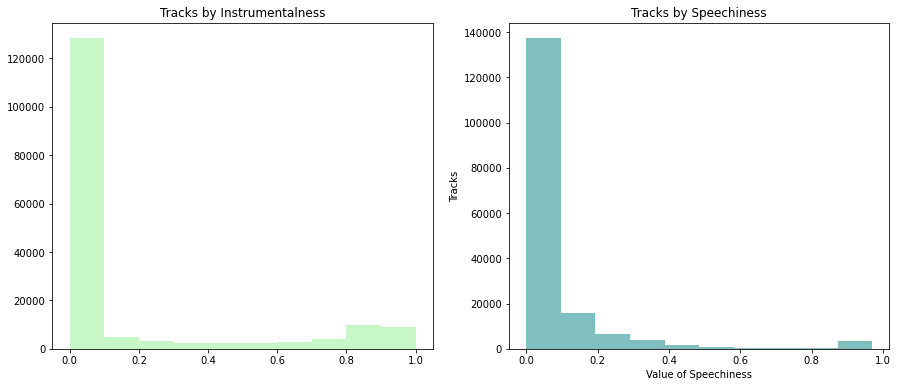

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))


ax1.set_title('Tracks by Instrumentalness')
ax2.set_xlabel('Value of Instrumentalness')
ax2.set_ylabel('Tracks')
ax1.hist(dataInstrumentalness, density=False, facecolor='lightgreen', alpha=0.5)

ax2.set_title('Tracks by Speechiness')
ax2.set_xlabel('Value of Speechiness')
ax2.set_ylabel('Tracks')
ax2.hist(dataSpeechiness, density=False, facecolor='teal', alpha=0.5)


plt.show()

_Author_: Ian Ramírez Revilla  
_Github_: https://github.com/IanRamRev/PyDataProducts4PredictiveAnalytics